In [ ]:
!pip install -q  langchain-openai langchain_community langchain langchainhub
!pip install -q  google-search-results wolframalpha


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.3/414.3 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# Function Calling and Tools in LLM Applications 🚀

## What is Function Calling in LLMs?

**Function calling** refers to the ability of a Large Language Model (LLM) to invoke specific functions or operations in response to user input. It allows LLMs to go beyond text generation and directly interact with external systems, perform calculations, or fetch real-time data, adding a layer of practical functionality to the AI model.

For example, if you ask an LLM to "calculate the sum of 12 and 8," the model doesn't just provide an answer; it can **call a function** to perform the addition and return the result.

### Why Use Function Calling in LLMs?

✅ **Enhances model capabilities** – Allows the LLM to perform operations like mathematical calculations, interacting with APIs, or processing data in real-time.  
✅ **Bridges the gap** – Helps LLMs connect with external services, databases, and tools to provide enriched and accurate responses.  
✅ **Real-time decision making** – Facilitates dynamic actions such as querying APIs or performing real-time computations based on user requests.

---

## What are Tools in LLMs?

**Tools** are external services, APIs, or libraries that LLMs can access to extend their capabilities. While LLMs are great at understanding and generating text, tools provide the ability to fetch external data, interact with the web, perform specific tasks (like sending emails, making HTTP requests, etc.), and manipulate information.

Tools can be integrated directly into the LLM pipeline using frameworks like LangChain, or they can be invoked independently by the LLM during an active session.

### Why Use Tools in LLMs?

✅ **Extended functionality** – Tools provide access to additional capabilities like real-time data fetching (e.g., weather, news), complex calculations, or database querying.  
✅ **External interactions** – Tools allow LLMs to interact with external systems (e.g., APIs, databases, or web scraping services).  
✅ **Customizability** – Developers can integrate custom tools tailored to their specific needs, such as integrating with proprietary databases, services, or APIs.

---

## Function Calling vs Tools in LLMs 🧐

| **Concept**     | **Function Calling**                               | **Tools**                             |
|-----------------|----------------------------------------------------|---------------------------------------|
| **Definition**  | Invoking specific functions (internal or external) to perform tasks | Using external services or APIs to extend LLM capabilities |
| **Purpose**     | Performs a predefined task, such as computation or querying | Extends the LLM’s functionality by allowing it to access external data or services |
| **Examples**    | A function that adds two numbers, queries a database, or processes a file | APIs for real-time data (weather, stock prices), web scraping, custom tools |
| **Interaction** | Directly calls a function from within the LLM pipeline | Integrates external APIs or services into the LLM's workflow |

---






In [ ]:
!pip install -q  langchain-openai langchain_community tiktoken langchain langchainhub
!pip install -q  google-search-results  wolframalpha

In [ ]:
import os
import json
from google.colab import userdata
openai_api_key = userdata.get('openai_api_key')
os.environ['OPENAI_API_KEY'] = userdata.get('openai_api_key')
os.environ['SERPAPI_API_KEY'] = userdata.get('SERPAPI_API_KEY')
os.environ['WOLFRAM_ALPHA_APPID'] = userdata.get('wolfram_alpha_appid')

In [ ]:
import requests

def get_weather(latitude, longitude):
    response = requests.get(f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m")
    data = response.json()
    return data['current']['temperature_2m']

In [ ]:
from openai import OpenAI
import json

client = OpenAI()

tools = [{
    "type": "function",
    "function": {
        "name": "get_weather",
        "description": "Get current temperature for provided coordinates in celsius.",
        "parameters": {
            "type": "object",
            "properties": {
                "latitude": {"type": "number"},
                "longitude": {"type": "number"}
            },
            "required": ["latitude", "longitude"],
            "additionalProperties": False
        },
        "strict": True
    }
}]

messages = [{"role": "user", "content": "who are you?"}]

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    tools=tools,
)

In [ ]:
completion

ChatCompletion(id='chatcmpl-B5wlRmByNCnZxNbrhbQZuIrRGHwRI', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='I am an AI assistant designed to help answer questions, provide information, and perform tasks using a variety of tools. How can I assist you today?', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1740757229, model='gpt-4o-2024-08-06', object='chat.completion', service_tier='default', system_fingerprint='fp_eb9dce56a8', usage=CompletionUsage(completion_tokens=32, prompt_tokens=55, total_tokens=87, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

In [ ]:
tool_call = completion.choices[0].message.tool_calls[0]
tool_call

ChatCompletionMessageToolCall(id='call_lfPl7KXvZbplALxpZWPykylx', function=Function(arguments='{"latitude":35.6892,"longitude":51.389}', name='get_weather'), type='function')

In [ ]:
args = json.loads(tool_call.function.arguments)
args

{'latitude': 35.6892, 'longitude': 51.389}

In [ ]:

result = get_weather(args["latitude"], args["longitude"])
result

4.1

In [ ]:
from langchain_core.tools import tool

@tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b


@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b


tools = [add, multiply]

langchain_core.tools.structured.StructuredTool

In [ ]:

multiply.invoke({'a':2,'b':30})

60

### Introduction to Pydantic

**Pydantic** is a data validation and settings management library for Python. It allows you to define data models with automatic validation and type enforcement using Python's type annotations. Pydantic ensures that the data provided to your application matches the expected structure, types, and constraints.

Pydantic is often used in web development (especially with **FastAPI**) but is also useful for any application that needs to ensure data integrity.

#### Key Features of Pydantic:
1. **Data Validation**: Automatically checks the validity of data based on the type annotations.
2. **Type Safety**: Uses Python type hints to enforce data types.
3. **Serialization**: Can easily serialize models to dictionaries and JSON.
4. **Error Handling**: Provides detailed error messages when validation fails.
5. **Parsing Data**: Converts input data (like JSON) into Python objects.

### Installing Pydantic

To get started with Pydantic, you need to install it first. You can install it using pip:

```bash
pip install pydantic


In [ ]:
from pydantic import BaseModel
from typing import Optional

# Define the User model
class User(BaseModel):
    username: str
    email: str
    full_name: Optional[str] = None
    follower_count: int

# Example of creating a User instance
user = User(
    username="alice_johnson",
    email="alice.johnson@example.com",
    full_name="Alice Johnson",
    follower_count=1000
)

# Output the user model
print(user)


username='alice_johnson' email='alice.johnson@example.com' full_name='Alice Johnson' follower_count=1000


In [ ]:
type(user)

__main__.User

In [ ]:
from pydantic import ValidationError

try:
    # Invalid data: 'follower_count' should be an integer
    user_invalid = User(
        username="bob_smith",
        email="bob.smith@example.com",

        follower_count=5  # Invalid, should be an integer
    )
except ValidationError as e:
    print(e)


In [ ]:
# Convert User model to a dictionary
user_dict = user.dict()
print(user_dict)

# Convert dictionary back to User model
user_from_dict = User(**user_dict)
print(user_from_dict)

# Convert User model to JSON string
user_json = user.model_dump_json()
print(user_json)


{'username': 'alice_johnson', 'email': 'alice.johnson@example.com', 'full_name': 'Alice Johnson', 'follower_count': 1000}
username='alice_johnson' email='alice.johnson@example.com' full_name='Alice Johnson' follower_count=1000
{"username":"alice_johnson","email":"alice.johnson@example.com","full_name":"Alice Johnson","follower_count":1000}


<ipython-input-137-d94b0ea0db7f>:2: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  user_dict = user.dict()


In [ ]:
user_json = user.model_dump_json()
print(user_json)


{"username":"alice_johnson","email":"alice.johnson@example.com","full_name":"Alice Johnson","follower_count":1000}


In [ ]:
from pydantic import BaseModel, Field

# Note that the docstrings here are crucial, as they will be passed along
# to the model along with the class name.
class AddInput(BaseModel):
    """Add two integers together."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")


@tool("add-tool", args_schema=AddInput, return_direct=True)
def add(a: int, b: int) -> int:
    """add two numbers."""
    return a + b

tools = [add, multiply]

In [ ]:
multiply.invoke({"a":2,"b":3})

6

In [ ]:

# os.environ['SERPAPI_API_KEY'] = userdata.get("serpapi_api_key")
# os.environ['WOLFRAM_ALPHA_APPID'] = userdata.get("wolfram_alpha_appid")


In [ ]:
import os

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")

llm_with_tools = llm.bind_tools(tools)



In [ ]:
llm.invoke("""135165435131313322323130130123 + 1233255552224463222111111""").content
#correct response = 13602805


'The sum of the two numbers 135165435131313322323130130123 and 1233255552224463222111111 is 136398690683537785545241241234.'

In [ ]:
llm_with_tools.invoke("""135165435131313322323130130123 + 1233255552224463222111111""")
# .tool_calls

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2GQ36nObh5f9kHdDp6D2pQnD', 'function': {'arguments': '{"a":135165435131313322323130130123,"b":1233255552224463222111111}', 'name': 'add-tool'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 110, 'total_tokens': 146, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-985138c1-56e5-4e1d-8028-9282545dbf3e-0', tool_calls=[{'name': 'add-tool', 'args': {'a': 135165435131313322323130130123, 'b': 1233255552224463222111111}, 'id': 'call_2GQ36nObh5f9kHdDp6D2pQnD', 'type': 'tool_call'}], usage_metadata={'input_tokens': 110, 'output_tokens': 36, 'total_tokens': 146, 'input_token

In [ ]:
# {"add": add, "multiply": multiply}['multiply']

In [ ]:
# add.invoke({'a': 1236958, 'b': 12365847})

In [ ]:
query = """135165435131313322323130130123 + 1233255552224463222111111"""
from langchain_core.messages import HumanMessage, ToolMessage

messages = [HumanMessage(query)]
#asking user query in a new request/prompt
ai_msg = llm_with_tools.invoke(messages)
messages.append(ai_msg)

for tool_call in ai_msg.tool_calls:
    print(tool_call)
    selected_tool = {"add": add, "multiply": multiply, 'add-tool': add}[tool_call["name"].lower()]
    # #asking LLM to generate function call with arguments
    # print(tool_call["args"])
    tool_output = selected_tool.invoke(tool_call["args"])
    # print(tool_output)
    messages.append(ToolMessage(tool_output, tool_call_id=tool_call["id"]))

{'name': 'add-tool', 'args': {'a': 135165435131313322323130130123, 'b': 1233255552224463222111111}, 'id': 'call_vRZYfVsI0BNlCLbkYcE3lZ0R', 'type': 'tool_call'}


In [ ]:

{"add": add, "multiply": multiply, 'add-tool': add}[tool_call["name"].lower()]

StructuredTool(name='add-tool', description='add two numbers.', args_schema=<class '__main__.AddInput'>, return_direct=True, func=<function add at 0x7c3822e98720>)

In [ ]:
tool_call["args"]

{'a': 135165435131313322323130130123, 'b': 1233255552224463222111111}

In [ ]:
'136398690683537785545241241234' == tool_output

False

In [ ]:
tool_output = selected_tool.invoke(tool_call["args"])


In [ ]:
messages

[HumanMessage(content=' add 1236958 to 12365847', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_TgnmL0xKAzHvGVnzjowY9Lpg', 'function': {'arguments': '{"a":1236958,"b":12365847}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 92, 'total_tokens': 114, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-142c4bf8-ae75-4964-963a-c55ee7f3c9d1-0', tool_calls=[{'name': 'add', 'args': {'a': 1236958, 'b': 12365847}, 'id': 'call_TgnmL0xKAzHvGVnzjowY9Lpg', 'type': 'tool_call'}], usage_metadata={'input_tokens': 92, 'output_tokens': 22, 'total_tokens': 114, 'in

In [ ]:
from langchain.agents import load_tools
tool_names = ["serpapi","wolfram-alpha"]
tools = load_tools(tool_names)

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(openai_api_key=openai_api_key,model='gpt-4o' ,temperature=0)


In [ ]:
for t in tools:

  print("tool's name: ",t.name)
  print("tool's description: ", t.description,'\n')

tool's name:  Search
tool's description:  A search engine. Useful for when you need to answer questions about current events. Input should be a search query. 

tool's name:  wolfram_alpha
tool's description:  A wrapper around Wolfram Alpha. Useful for when you need to answer questions about Math, Science, Technology, Culture, Society and Everyday Life. Input should be a search query. 



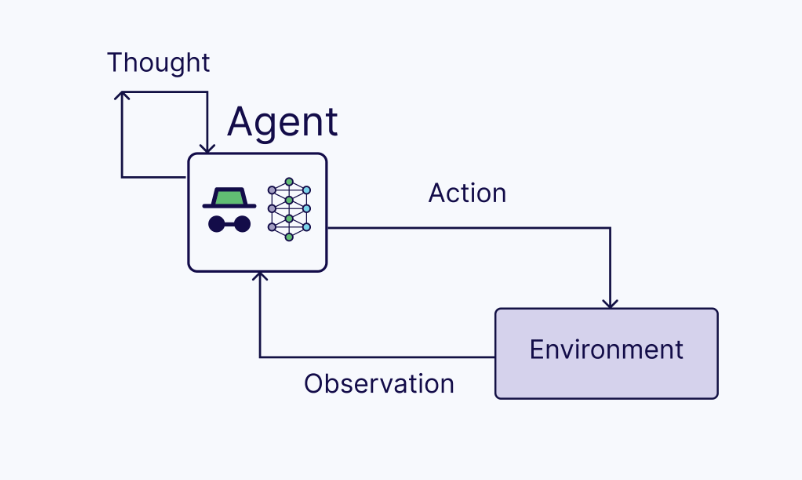

In [ ]:
from langchain.agents import AgentExecutor, create_react_agent
from langchain import hub
prompt = hub.pull("hwchase17/react")
print(prompt.template)




/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [ ]:
dir(tool)

['Config',
 'InputType',
 'OutputType',
 '__abstractmethods__',
 '__annotations__',
 '__call__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__config__',
 '__custom_root_type__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__exclude_fields__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__include_fields__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__json_encoder__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__orig_bases__',
 '__parameters__',
 '__post_root_validators__',
 '__pre_root_validators__',
 '__pretty__',
 '__private_attributes__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__repr_args__',
 '__repr_name__',
 '__repr_str__',
 '__rich_repr__',
 '__ror__',
 '__schema_cache__',
 '__setattr__',
 '__setstate__',
 '__signature__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__try_updat

In [ ]:

agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True, max_iterations=20, handle_parsing_errors=True)

i = -1
query_list =["""تفاوت لیست و تاپل در پایتون چیست؟""",
     """دمای هوای شهر تهران امروز چند درجه سانتیگراد است؟""",
             """قیمت یک تلویزیون بیست میلیون تومان است اگر 9% ارزش افزوده به آن تعلق بگیرید قیمت آن جقدر میشود؟
             اگر خریدار 30 درصد مبلغ را نقد و بقیه را در 20 قسط مساوی پرداخت کند، هر قسط او چقدر میشود؟""" ]


In [ ]:
query_list[i]

'قیمت یک تلویزیون بیست میلیون تومان است اگر 9% ارزش افزوده به آن تعلق بگیرید قیمت آن جقدر میشود؟\n             اگر خریدار 30 درصد مبلغ را نقد و بقیه را در 20 قسط مساوی پرداخت کند، هر قسط او چقدر میشود؟'

In [ ]:

!pip install nest_asyncio

# Allow nested asyncio loops
import nest_asyncio
nest_asyncio.apply()

import asyncio  # Make sure to import asyncio

# Move your use of qa_chain into an async function
async def main():
    result = agent_executor.invoke({"input": query_list[i]})
    print(result)

# Run your async function in the existing event loop
loop = asyncio.get_event_loop()
loop.run_until_complete(main())




> Entering new AgentExecutor chain...
To solve this problem, we need to calculate the total price of the television including the 9% value-added tax (VAT) and then determine the installment payment plan.

1. Calculate the total price including VAT.
2. Determine the down payment (30% of the total price).
3. Calculate the remaining amount to be paid in installments.
4. Divide the remaining amount by the number of installments to find the installment amount.

Let's start with the first step.

Action: wolfram_alpha
Action Input: "20000000 + 9% of 20000000"Assumption: 20000000 + 20000000×9% 
Answer: 21800000The total price of the television including the 9% VAT is 21,800,000 تومان. Now, let's calculate the down payment and the installment amount.

1. Calculate the down payment (30% of the total price).
2. Calculate the remaining amount to be paid in installments.
3. Divide the remaining amount by the number of installments (20) to find the installment amount.

Action: wolfram_alpha
Action

# AI Agents

## Introduction

Artificial Intelligence (AI) agents are autonomous systems designed to perform specific tasks, answer questions, and automate processes for users. These agents vary widely in complexity, ranging from simple chatbots to advanced AI assistants capable of running complex workflows autonomously. In the context of Azure Cosmos DB, AI agents can enhance database operations by automating data management tasks, improving query performance, and providing intelligent insights.

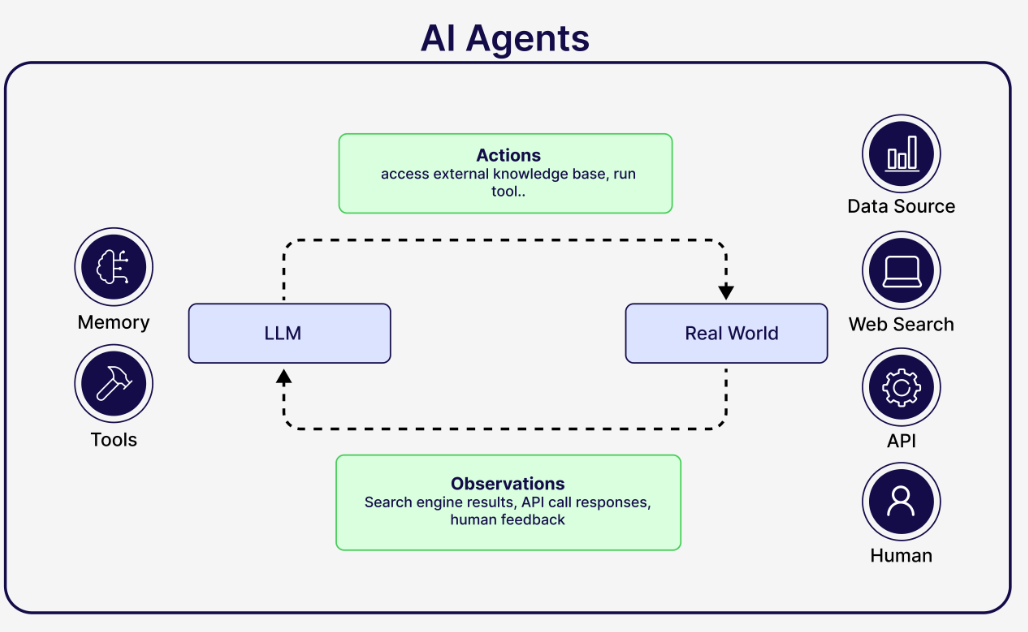



## What Are AI Agents?

Unlike standalone large language models (LLMs) or rule-based systems, AI agents possess several key features:

- **Planning**: AI agents can plan and sequence actions to achieve specific goals, enabling them to handle complex tasks effectively.

- **Tool Usage**: Advanced AI agents can utilize various tools, such as code execution, search, and computation capabilities, to perform tasks efficiently. They often use these tools through function calling.

- **Perception**: AI agents can perceive and process information from their environment, including visual, auditory, and other sensory data, making them more interactive and context-aware.

- **Memory**: AI agents have the ability to remember past interactions and behaviors, storing these experiences to inform future actions. This memory component allows for continuity and improvement in agent performance over time.


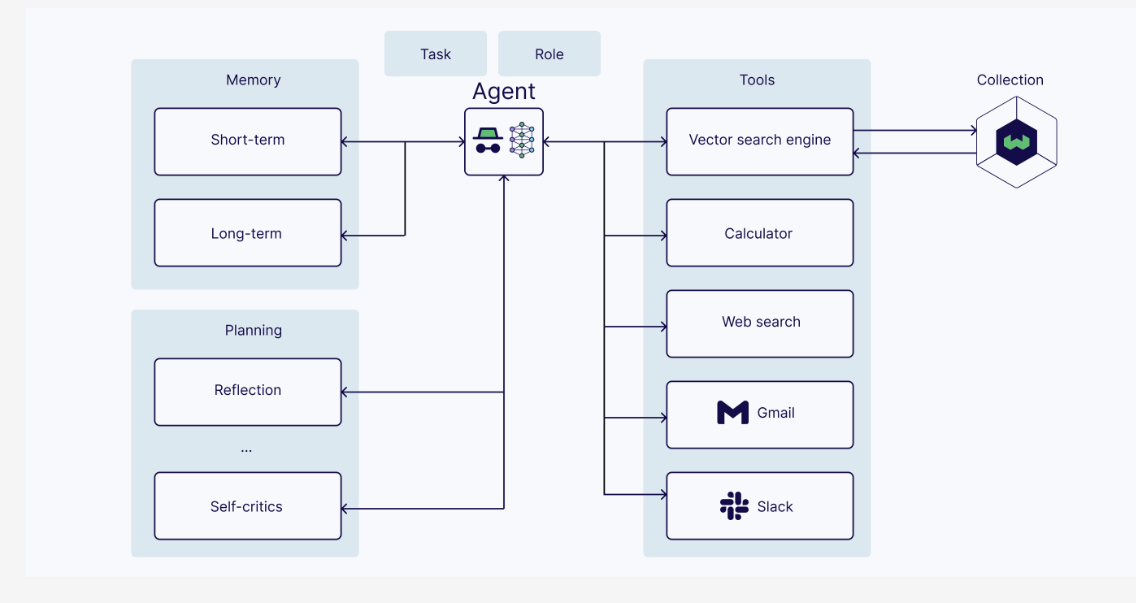



## Applications of AI Agents

AI agents are transforming various sectors by automating complex tasks and enhancing decision-making processes. Some notable applications include:

### 1. Healthcare

AI agents are being developed to automate administrative tasks and assist with patient care. For instance, agents like Grace, Max, and Tom can enroll participants in clinical trials, compile patient medical histories, and schedule appointments, thereby reducing physician burnout and improving care.

### 2. Customer Support

AI agents enhance customer service by handling a wider variety of inquiries, improving response times, and providing consistent support. They can autonomously manage routine customer interactions, allowing human agents to focus on more complex issues.

### 3. Cybersecurity

In cybersecurity, AI agents can autonomously detect and mitigate threats in real-time. They analyze network traffic, identify anomalies, and respond to potential security breaches without human intervention, enhancing the organization's security posture.

### 4. Business Intelligence

AI agents support business intelligence by processing large datasets to extract valuable insights. They can autonomously generate reports, identify trends, and provide actionable recommendations, aiding in strategic decision-making.

## Agentic vs. Non-Agentic Approaches

### Agentic Approaches

Agentic AI systems operate autonomously, making decisions and performing tasks with minimal human oversight. They are designed to handle complex, dynamic environments and can adapt to new situations through learning and reasoning. This approach is characterized by:

- **Autonomy**: The ability to operate independently, making decisions without human intervention.

- **Adaptability**: Learning from interactions and experiences to improve performance over time.

- **Complex Problem-Solving**: Handling multifaceted tasks that require reasoning and decision-making.

### Non-Agentic Approaches

Non-agentic AI systems, on the other hand, are typically rule-based and operate within predefined parameters. They lack the capacity for autonomous decision-making and are limited to tasks they have been explicitly programmed to perform. Characteristics include:

- **Dependence on Human Input**: Relying on human instructions for task execution.

- **Limited Adaptability**: Inability to learn from experiences or adapt to new situations.

- **Simpler Problem-Solving**: Handling tasks that are straightforward and do not require complex reasoning.


## Implementing AI Agents

To integrate AI agents with Azure Cosmos DB, consider the following steps:

1. **Define Objectives**: Clearly outline the tasks and processes you aim to automate or enhance with AI agents.

2. **Select Appropriate Tools**: Choose AI frameworks and tools

3. **Develop and Train Agents**: Develop AI agents tailored to your specific requirements and train them using relevant data to ensure effective performance.

4. **Monitor and Optimize**: Continuously monitor the performance of AI agents and make necessary

## Conclusion

AI agents represent a significant advancement in artificial intelligence, offering the potential to automate complex tasks, enhance decision-making, and improve efficiency across various sectors. Understanding the distinctions between agentic and non-agentic approaches, along with the ethical considerations involved, is essential for harnessing the full potential of AI agents responsibly.


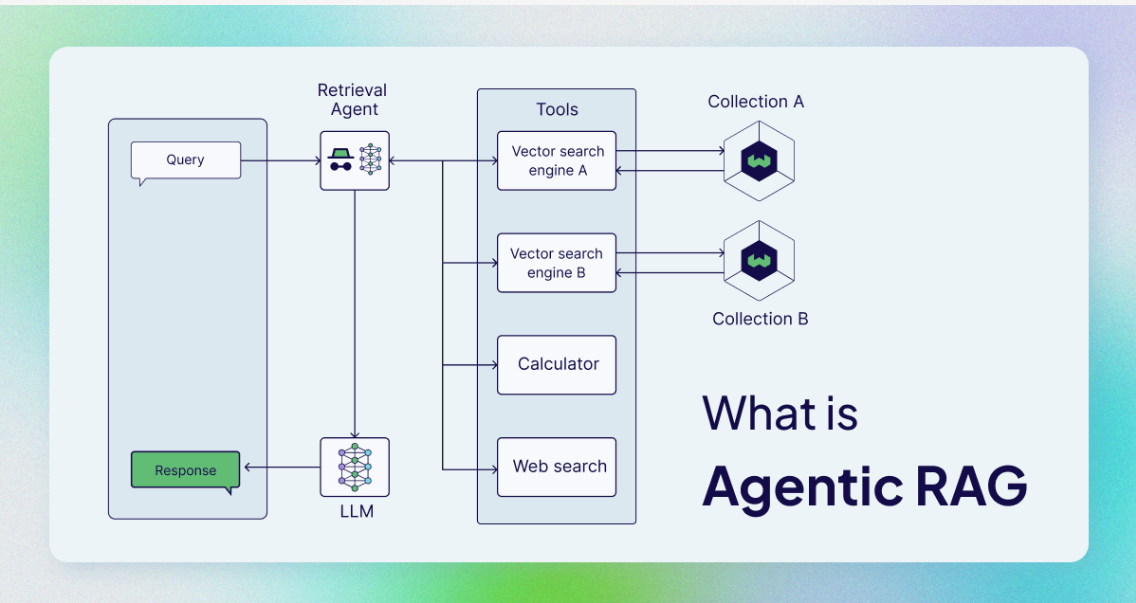

In [ ]:
!pip install -qU wikipedia arxiv


In [ ]:
from langchain.retrievers import WikipediaRetriever

retriever = WikipediaRetriever(top_k_results=1)
# retriever = ArxivRetriever(load_max_docs=2)

In [ ]:
from operator import itemgetter
from langchain_core.output_parsers import StrOutputParser
from langchain.prompts import PromptTemplate, ChatPromptTemplate, MessagesPlaceholder

from langchain_core.runnables import RunnableParallel, RunnablePassthrough
retrieval_chain = prompt | llm | StrOutputParser()
from langchain.agents import AgentExecutor, create_openai_functions_agent



In [ ]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(
   retriever, "wikipedia", "Wikipedia is a free online encyclopedia "
)

In [ ]:
tools = [retriever_tool]
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant who answers honestly",
        ),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
        ("user", "{input}"),
    ]
)
agent = create_openai_functions_agent(
    llm=llm, prompt=prompt, tools=tools
)
agent_executor = AgentExecutor(
    agent=agent, tools=tools, max_iterations=5, verbose= True, early_stopping_method="generate"
)
#  | (lambda x: x["output"])

In [ ]:
query = "Which country won most gold medals at summer Olympics 2024?"
query = '2 + 6?'
async def main():
    result = agent_executor.invoke({"input": query, 'chat_history':[]})
    print(result)

# Run your async function in the existing event loop
loop = asyncio.get_event_loop()
loop.run_until_complete(main())



> Entering new AgentExecutor chain...
2 + 6 equals 8.

> Finished chain.
{'input': '2 + 6?', 'chat_history': [], 'output': '2 + 6 equals 8.'}


In [ ]:
llm.invoke(query)

AIMessage(content="I'm sorry, but I don't have access to information about events occurring after October 2023, including the results of the 2024 Summer Olympics. You may want to check the latest updates from reliable sports news sources or the official Olympics website for the most current information.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 20, 'total_tokens': 75, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'stop', 'logprobs': None}, id='run-37c93ddd-97b1-4f8a-8722-0fba772b9db3-0', usage_metadata={'input_tokens': 20, 'output_tokens': 55, 'total_tokens': 75, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0